In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
#import project_code as pc

In [5]:
#funkcja import pliku
def f_file_import(name:str):
    return pd.read_csv(name)

In [6]:
#Zaimportowanie pliku z pc
df_clean = f_file_import('df_clean.csv')

# W którym kraju jaka kategoria jest najbardziej popularna i dochodowa

In [ ]:
#potrzebne zmienne:
"""
country
main_category
zagregowana tabela z liczebnościami, procentami, średnią i medianą dla usd_goal_real oraz usd_pledged_real
"""
#potrzebne funkcje
    """
    #popularność:
    + wykres country od main_category - liczebności i procenty
    + wykres country od state - liczebność i procenty
    #dochodowość:
+- agregująca
    - wykres country od main_category i state - średnia i mediana dla usd_goal_real oraz usd_pledged_real
    """

In [40]:
#definicja development
#funkcja agregująca dane do nowego DF
def aggregate_fun(df, agg_list:list, measure:str):
    agg_df = df.groupby(agg_list)[measure].agg(['count',sum,'mean', 'median']).reset_index()
    return agg_df
    #['country','main_category'] 'usd_pledged_real'

In [61]:
#funkcja bar plot z procentami
def barplot_pct(df, lista_2_elementy:list ):
    #agregujemy po 2 zmiennych, otrzymujemy count, sum, mean, median
    df_new = aggregate_fun(df, lista_2_elementy, 'ID' )
        #['country', 'main_category']
    
    #zmieniamy nazwę w nowo utworzonym DF, bo wysypuje się na nazwach typu count
    df_new.rename(columns= {'count':'count_y', 'sum':'sum_y', 'mean':'mean_y', 'median':'median_y'}, inplace=True)

    #agregujemy drugiego DF po 1 zmiennej - będziemy brać z tego sumę
    df_new_1 = aggregate_fun(df_new, lista_2_elementy[1], 'count_y')
        #['main_category']

    #zmieniamy nazwę drugiego DF, bo wysypuje się na nazwach typu count
    df_new_1.rename(columns= {'count':'count_x', 'sum':'sum_x', 'mean':'mean_x', 'median':'median_x'}, inplace=True)

    #merge'ujemy powyższe DFy, z pierwszego bierzemy count_y, z drugiego sum_x,
    # merge jako inner join, łączenie po XXXXXX
    df_new_2 = pd.merge(df_new[[lista_2_elementy[0], lista_2_elementy[1], 'count_y']],
    df_new_1[[lista_2_elementy[1],'sum_x']], how='inner', on=lista_2_elementy[1])
        #'country','main_category'
        #'main_category' x2

    #Tworzymy nową kolumnę procent
    df_new_2['pct'] = df_new_2['count_y']/df_new_2['sum_x'] * 100

    #Odwołanie do funkcji tworzącej wykres
    bar_plot(df_new_2, lista_2_elementy[1], lista_2_elementy[0],'pct', 2,8);
        #'main_category' 'country'
    

#agg_country_main_category.rename(columns= {'count':'count_y', 'sum':'sum_y', 'mean':'mean_y', 'median':'meadian_y'}, inplace=True)
#agg_country_main_category.head()

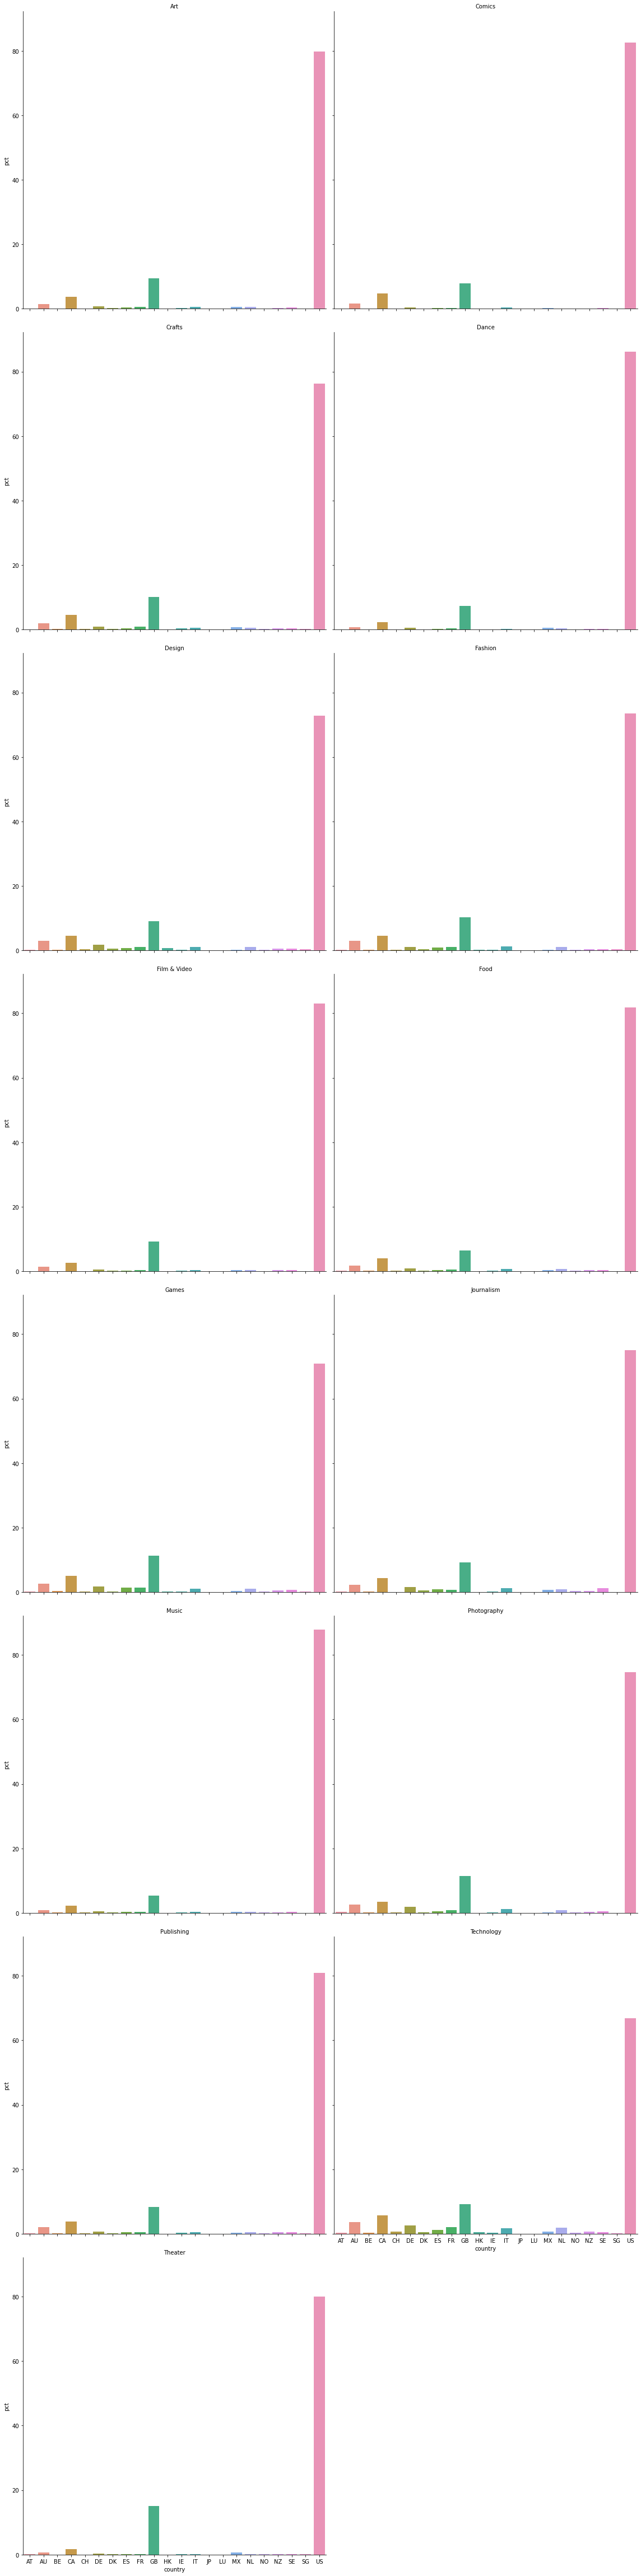

In [63]:
country_main_category_barplot_pct = barplot_pct(df_clean,['country', 'main_category'])

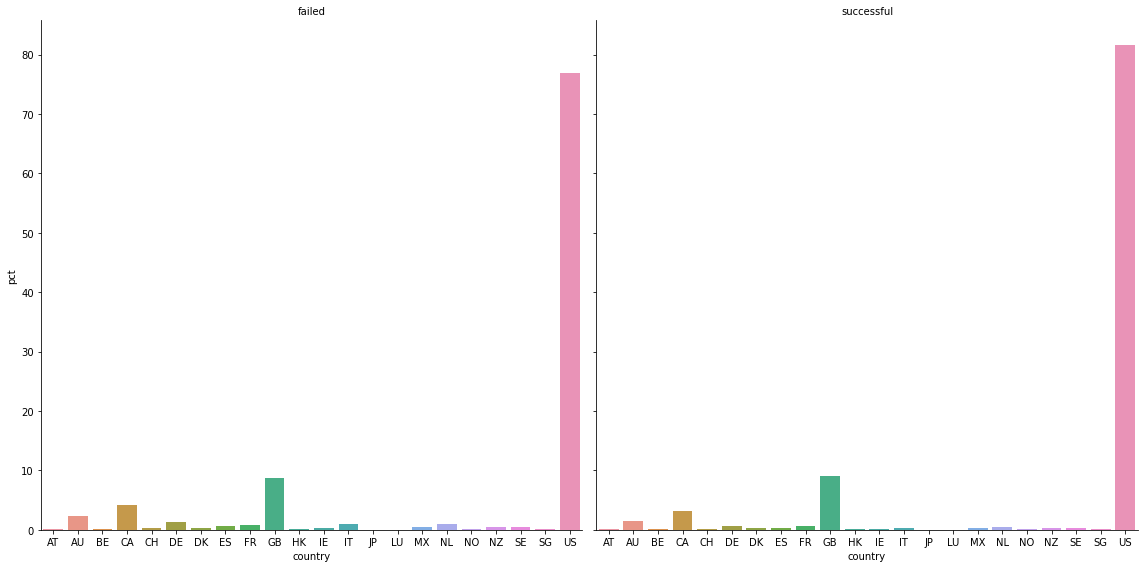

In [64]:
country_state_barplot_pct = barplot_pct(df_clean,['country', 'state'])

In [50]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def bar_plot_2_var(df, var_col:str, var_x:str, var_y:str, column_wrap:int =3, height_value:float = 4):
    g = sns.catplot(data = df, col = var_col , x = var_x, y=var_y, kind = 'bar', height = height_value, col_wrap=column_wrap)
    g.set_titles('{col_name}');

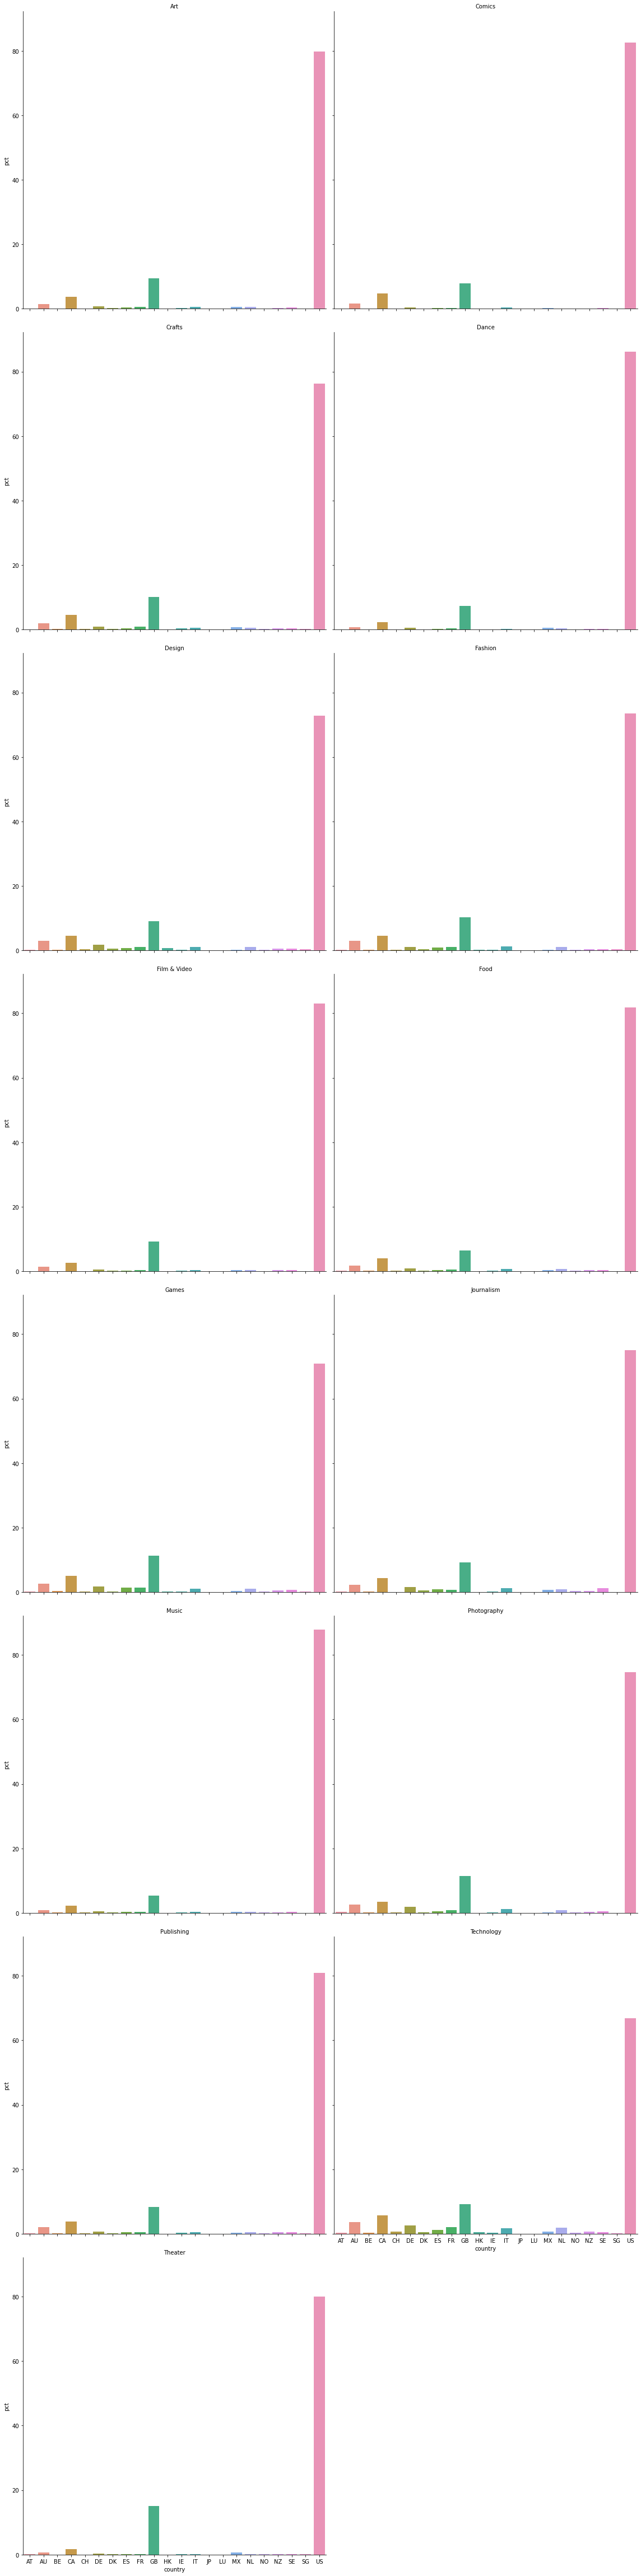

In [51]:
bar_plot(agg_country_main_category, 'main_category', 'country','pct', 2,8)

In [71]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def count_plot_col(df, var1:str, var2:str,column_wrap:int =3, height_value:float = 4):
    g = sns.catplot(data = df, col = var1 , x = var2,  kind = 'count', height = height_value, col_wrap=column_wrap)
    g.set_titles('{col_name}');
    #'country' 'main_category' 'count'
    #y = measure ,

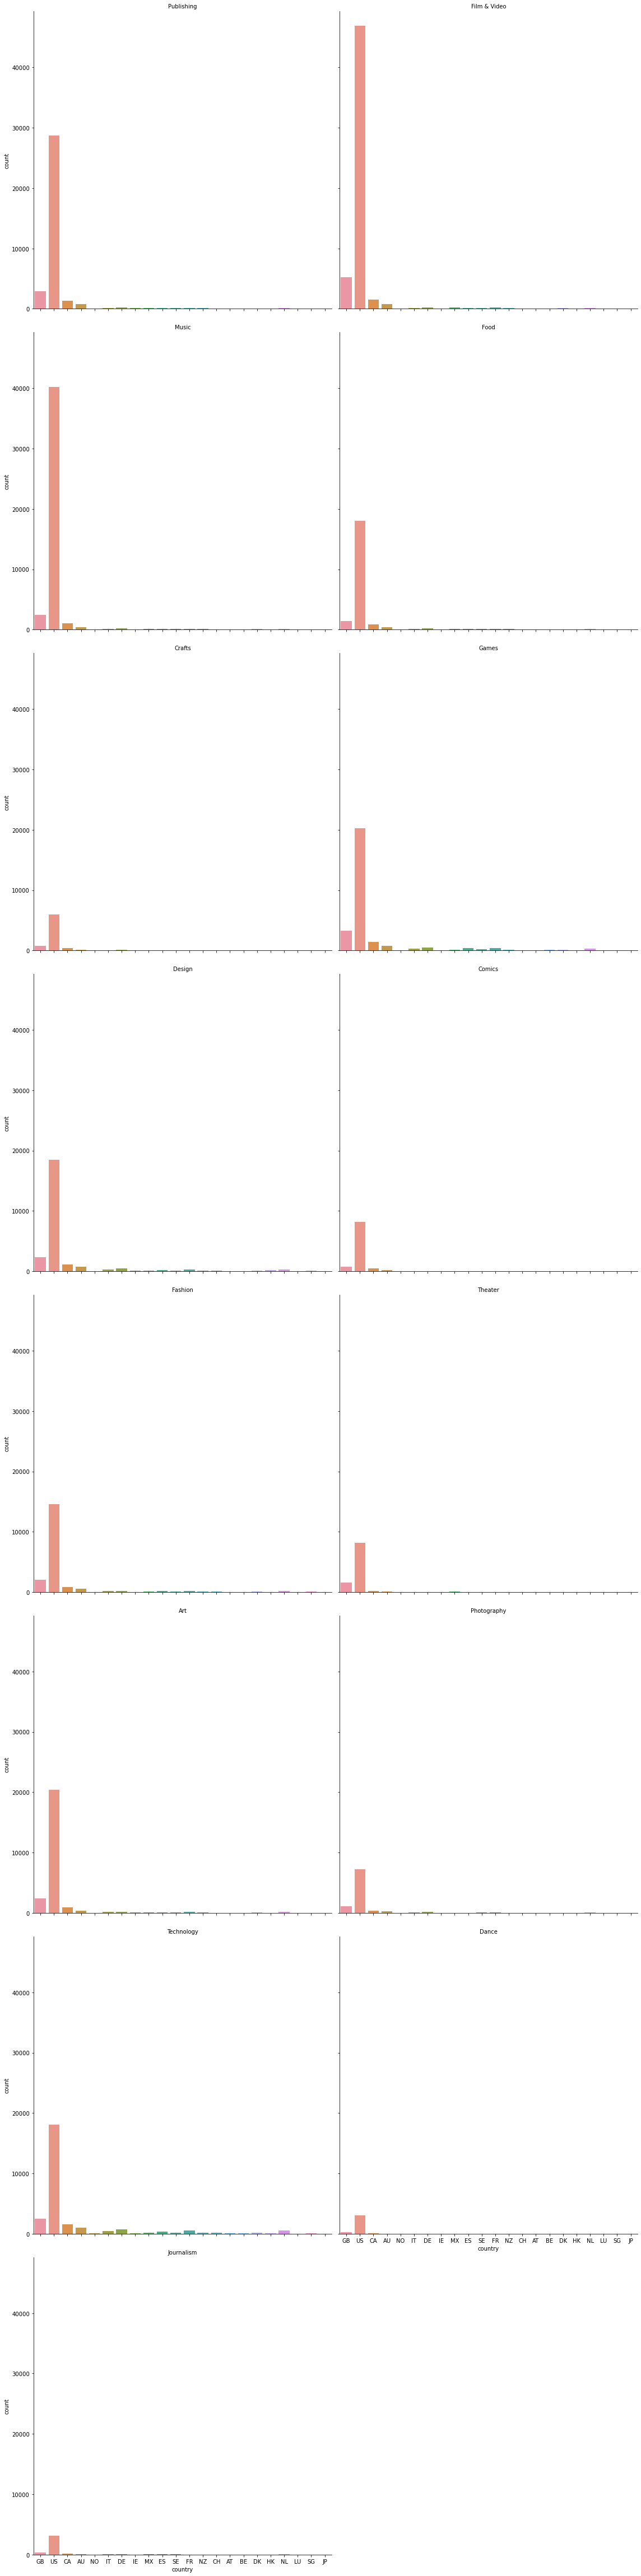

In [16]:
country_main_category = barplot_2var(df_clean, 'main_category', 'country', 2,8)

# wzrost popularności rok po roku/miesiąc po miesiącu

In [ ]:
#potrzebne zmienne:
"""
rok i miesiąc launched
(kwartał launched)
zagregowana tabela z liczebnościami, YoY
"""
#potrzebne funkcje
    """
    + agregująca
    + wykres rok/miesiąc (kwartał) liczebności
    + wykres rok/miesiąc w kontekście innej zmiennej, przykładowo main_category
    - wykres zmian procentowych rok do roku/miesiąc do miesiąca(/kwartał do kwartału)
    """

In [ ]:
def bar_plot_2_var(df, var_col:str, var_x:str, var_y:str, column_wrap:int =3, height_value:float = 4):
    g = sns.catplot(data = df, col = var_col , x = var_x, y=var_y, kind = 'bar', height = height_value, col_wrap=column_wrap)
    g.set_titles('{col_name}');

In [65]:
#funkcja wykres słupkowy - liczebność - jedna zmienna
def bar_plot_1_var(name, group_var:str, size:tuple = (10,6)):
    name.groupby(group_var)[group_var].count().sort_values(ascending = False).plot(kind = 'bar', figsize = size);

In [67]:
#funkcja wykres słupkowy - liczebność - jedna zmienna - dla dat
def bar_plot_1_var_date(name, group_var:str, size:tuple = (10,6)):
    name.groupby(group_var)[group_var].count().plot(kind = 'bar', figsize = size);

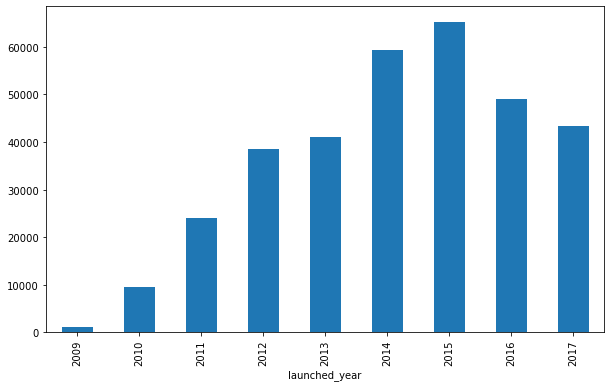

In [68]:
year_count = bar_plot_1_var_date(df_clean, 'launched_year')

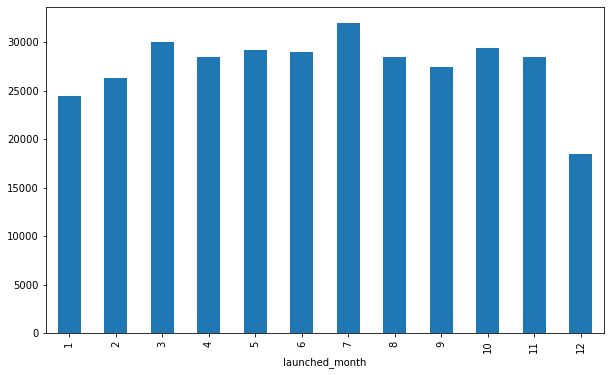

In [69]:
year_count = bar_plot_1_var_date(df_clean, 'launched_month')

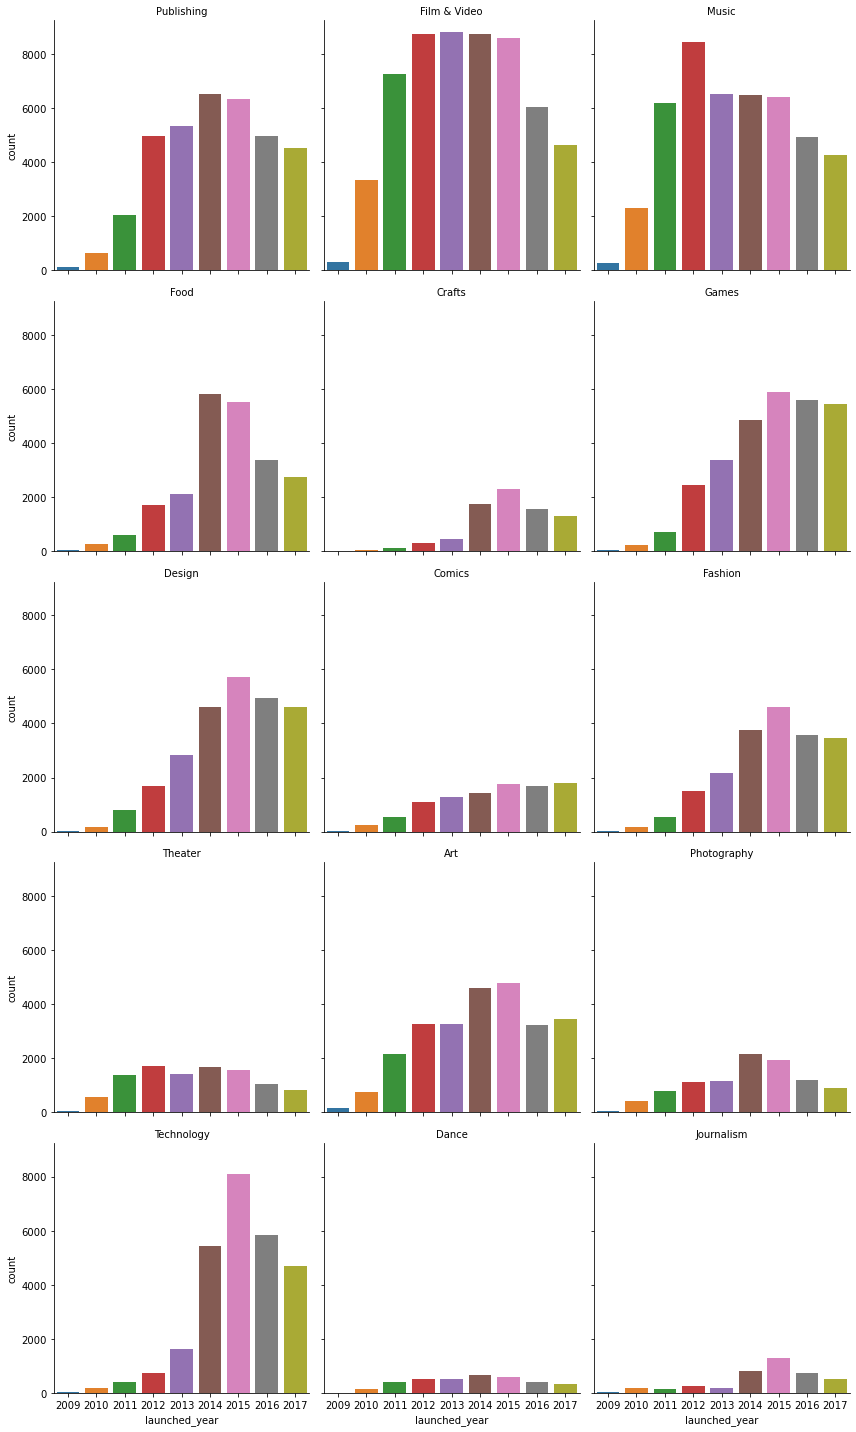

In [72]:
year_main_category_count = count_plot_col(df_clean, 'main_category', 'launched_year')

# ile średnio wpłacała jednostka per kategoria/podkategoria

In [ ]:
#potrzebne zmienne:
"""
main_category
średnia usd_pledged_real
"""
#potrzebne funkcje
    """
    + wykres średniej kwoty na kategorie
    """

In [73]:
#funkcja wykres słupkowy - średnia - jedna zmienna + zmienna grupowana
# var1 - zmienna grupująca, var2 - zmienna grupowana
def bar_plot_1_var_mean(df, group_var:str, groupped_var:str):
    df.groupby(group_var)[groupped_var].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,8));

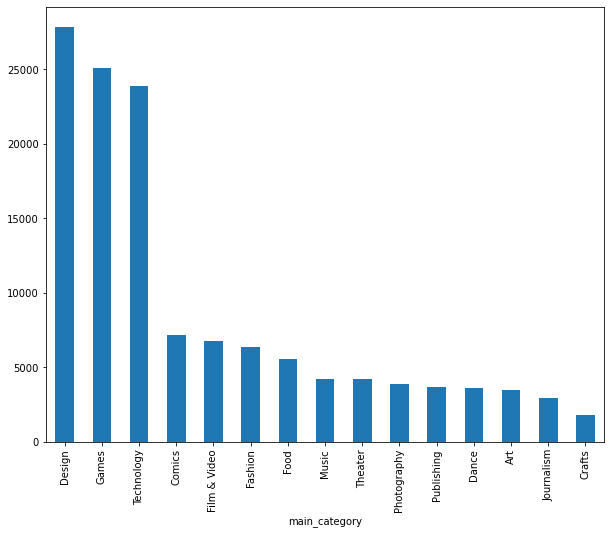

In [74]:
main_category_usd_pledged_real_mean = bar_plot_1_var_mean(df_clean, 'main_category', 'usd_pledged_real')

In [40]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
#import project_code as pc

In [41]:
df_clean = pc.f_file_import('df_clean.csv')

***

In [42]:
# Stworzenie zagregowanych tabeli:

In [43]:
country_state_usd_goal_real_df = pc.aggregate_fun(df_clean, ['country','state'], 'usd_goal_real')
pc.sorting_values(country_state_usd_goal_real_df).head()

,index,country,state,count,sum,mean
0,8,CH,failed,465,1.960094e+08,421525.553312
1,16,FR,failed,1612,2.119308e+08,131470.710974
2,10,DE,failed,2499,2.536111e+08,101485.045966
3,24,IT,failed,1930,1.912716e+08,99104.481746
4,32,NL,failed,1794,1.613765e+08,89953.460708


In [44]:
country_state_usd_pledged_real_df = pc.aggregate_fun(df_clean, ['country','state'], 'usd_pledged_real')
country_state_usd_pledged_real_df.head()

,country,state,count,sum,mean
0,AT,failed,378,600429.16,1588.436931
1,AT,successful,107,8551657.31,79922.030935
2,AU,failed,4606,5384556.90,1169.031025
3,AU,successful,2010,37703715.97,18758.067647
4,BE,failed,371,360382.29,971.380836


***

In [45]:
#definicja development
#funkcja wykres słupkowy - liczebność - jedna zmienna
def f_barplot_1_var(name, var:str, size:tuple = (10,6)):
    name.groupby(var)[var].count().sort_values(ascending = False).plot(kind = 'bar', figsize = size);

In [46]:
#definicja development
#funkcja agregująca dane do nowego DF
def aggregate_fun(df, agg_list:list, measure:str):
    agg_df = df.groupby(agg_list)[measure].agg(['count',sum,'mean']).reset_index()
    return agg_df
    #['country','main_category'] 'usd_pledged_real'

In [47]:
#definicja development
#funkcja sortująca
def sorting_values(df_agg, value_by:str = 'mean', sorting_var:bool = False):
    return df_agg.sort_values(by =value_by, ascending= sorting_var).reset_index()

In [48]:
#Przypisanie do zmiennej
df_agg = sorting_values(country_state_usd_pledged_real_df)
df_agg.head()

,index,country,state,count,sum,mean
0,1,AT,successful,107,8551657.31,79922.030935
1,9,CH,successful,187,11278747.18,60314.156043
2,33,NL,successful,617,25057975.04,40612.601361
3,21,HK,successful,216,8650421.43,40048.247361
4,11,DE,successful,937,33582266.36,35840.198890


In [49]:
#definicja development
#funkcja wykres słupkowy - liczebność - dwie zmienne - col x
def barplot_2var(df, var1:str, var2:str, measure, height_value:float = 4):
    sns.catplot(data = df, col = var1 , x = var2, y = measure , kind = 'bar', height = height_value);
    #'country' 'main_category' 'count'

In [50]:
#definicja development
#funkcja wykres słupkowy - średnia - dwie zmienne
# var1 - zmienna grupująca, var2 - zmienna grupowana
def f_barplot_2_var_mean(name, var1:str, var2:str, size:tuple = (10,6)):
    name.groupby(var1)[var2].mean().sort_values(ascending=False).plot(kind='bar', figsize = size);

### Kraje

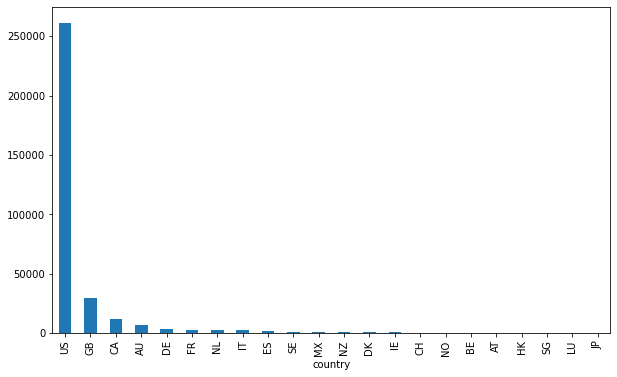

In [51]:
country_count = f_barplot_1_var(df_clean, 'country')

### Kategoria Główna

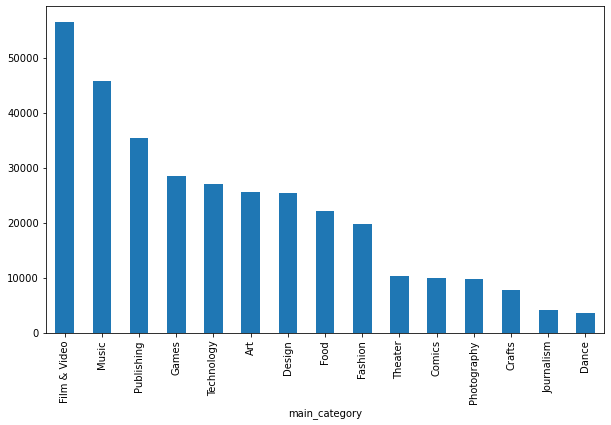

In [52]:
main_category_count = f_barplot_1_var(df_clean, 'main_category')

### Statusy

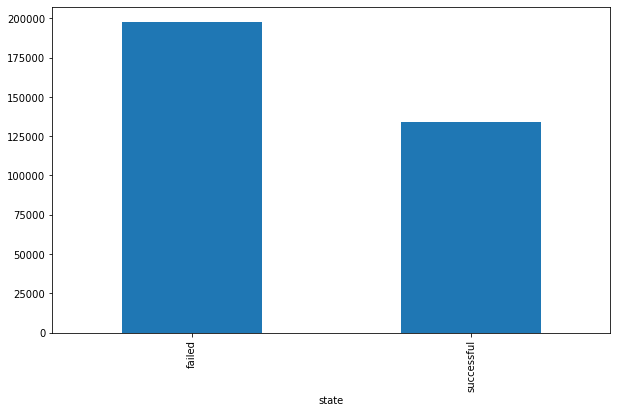

In [53]:
state_count = f_barplot_1_var(df_clean, 'state')

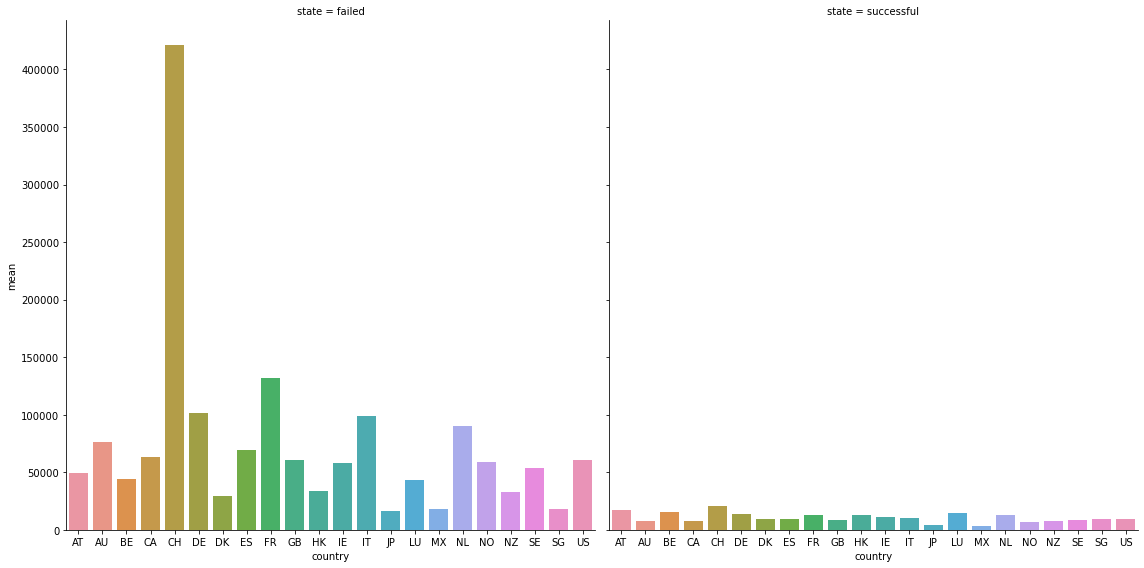

In [54]:
#średnia kwota celu w poszczególnych krajach w podziale na udane i nieudane projekty
barplot_2var(country_state_usd_goal_real_df, 'state', 'country', 'mean', 8)

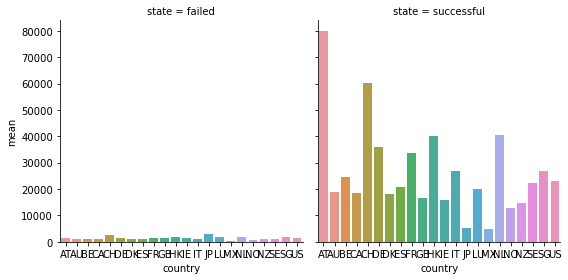

In [55]:
#średnia uzbierana kwota w poszczególnych krajach w podziale na udane i nieudane projekty
barplot_2var(country_state_usd_pledged_real_df, 'state', 'country', 'mean')